<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
!pip install tensorflow



In [3]:
pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [3]:
# insert code here

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [7]:
# insert code here
diabetes = load_diabetes()

In [10]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [13]:
# insert code here

X = diabetes.data

print("X is a ", type(X))
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

n_cols = X.shape[1]
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [15]:
len(y)

442

In [18]:
y.shape

(442,)

### Split the data (training/test)

In [23]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [25]:
# insert code here
model = Sequential()

In [28]:
model.add(Input(shape=(n_cols,)))

model.add(Dense(15, activation = 'relu'))

model.add(Dense(5, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))

In [31]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [35]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [40]:
%%time
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

CPU times: user 577 μs, sys: 55 μs, total: 632 μs
Wall time: 591 μs


In [44]:
%%time
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 28729.3203 - mse: 28729.3203 - val_loss: 28072.3145 - val_mse: 28072.3145
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28690.4258 - mse: 28690.4258 - val_loss: 28027.7246 - val_mse: 28027.7285
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28637.6230 - mse: 28637.6230 - val_loss: 27966.9902 - val_mse: 27966.9902
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28565.4746 - mse: 28565.4746 - val_loss: 27881.5547 - val_mse: 27881.5547
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28464.6582 - mse: 28464.6582 - val_loss: 27762.3965 - val_mse: 27762.3965
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28326.0488 - mse: 28326.0488 - val_loss: 27604.9004 - val_mse: 27604.9004
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28148.7617 - mse: 28148.7578 - val_loss: 27400.4707 - val_mse: 27400.4707
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2

### Create predictions

In [47]:
# insert code here
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [50]:
predictions

array([[176.76645 ],
       [190.06404 ],
       [172.51576 ],
       [231.06082 ],
       [193.72203 ],
       [262.17114 ],
       [153.59908 ],
       [ 66.21615 ],
       [150.84789 ],
       [170.96059 ],
       [215.25154 ],
       [193.99973 ],
       [ 93.4566  ],
       [227.77138 ],
       [ 88.657974],
       [225.30864 ],
       [ 84.82906 ],
       [122.41471 ],
       [134.11716 ],
       [159.62138 ],
       [ 82.23326 ],
       [ 79.00735 ],
       [195.78201 ],
       [119.369896],
       [234.98723 ],
       [188.68567 ],
       [123.57905 ],
       [ 94.72865 ],
       [184.74461 ],
       [229.8071  ],
       [223.85748 ],
       [225.33273 ],
       [165.13557 ],
       [116.478455],
       [127.88474 ],
       [158.1567  ],
       [106.47018 ],
       [234.98923 ],
       [210.19449 ],
       [126.9873  ],
       [ 95.72567 ],
       [122.16765 ],
       [184.18611 ],
       [231.70044 ],
       [139.19916 ],
       [270.1467  ],
       [151.72878 ],
       [201.9

### Evaluate the model

In [54]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3293.1147 - mse: 3293.1147 

Test loss: 3293.114746


In [57]:
score

[3293.11474609375, 3293.11474609375]

In [60]:
score[0] ** (1/2)

57.38566673041056

In [63]:
y.mean()

152.13348416289594

In [66]:
y.std()

77.00574586945044

In [69]:
y.min()

25.0

In [72]:
y.max()

346.0

### Visualisation of cost

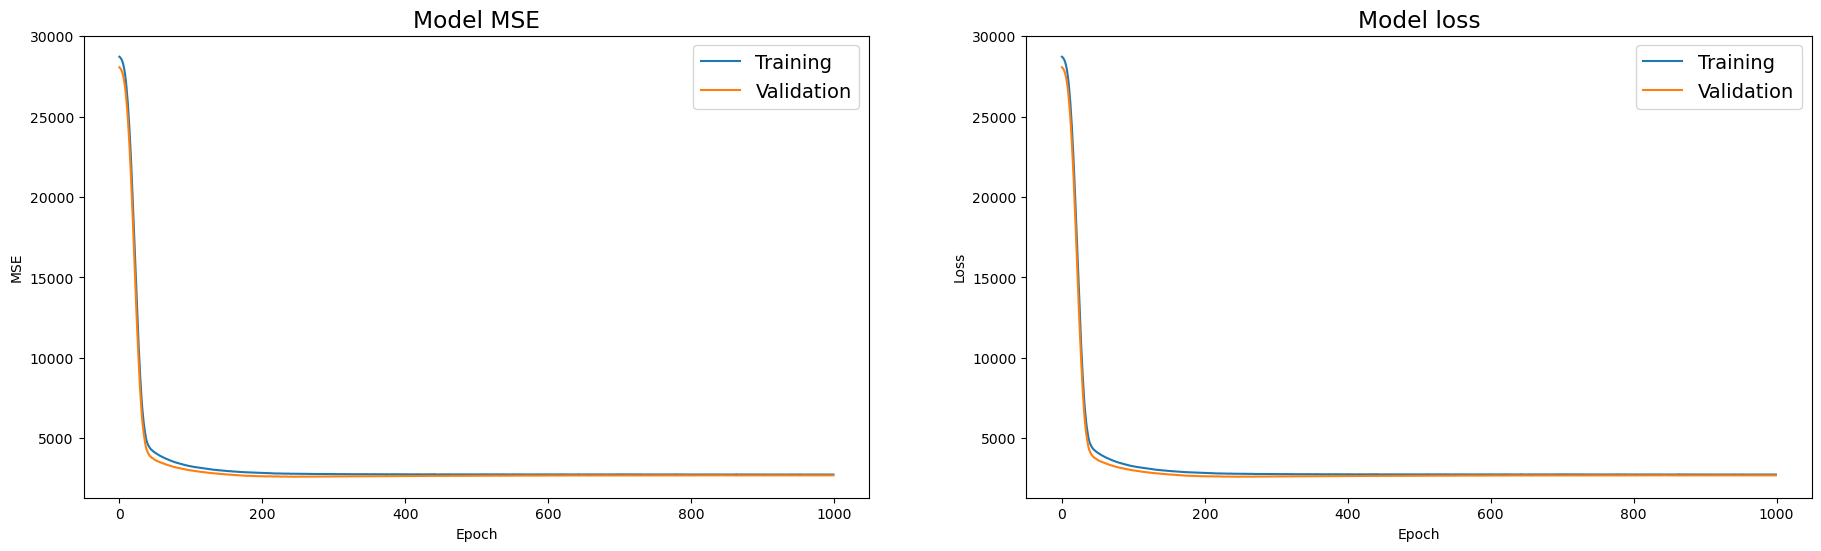

In [76]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})


ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()


ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [84]:
# insert code here
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\:'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\:'
/var/folders/8l/h98vns_133n1q9j7_nxsjwjr0000gn/T/ipykernel_1489/3871540576.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
/var/folders/8l/h98vns_133n1q9j7_nxsjwjr0000gn/T/ipykernel_1489/3871540576.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat y - y$')
/var/folders/8l/h98vns_133n1q9j7_nxsjwjr0000gn/T/ipykernel_1489/3871540576.py:14: SyntaxWarning: invalid escape sequence '\:'
  '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),


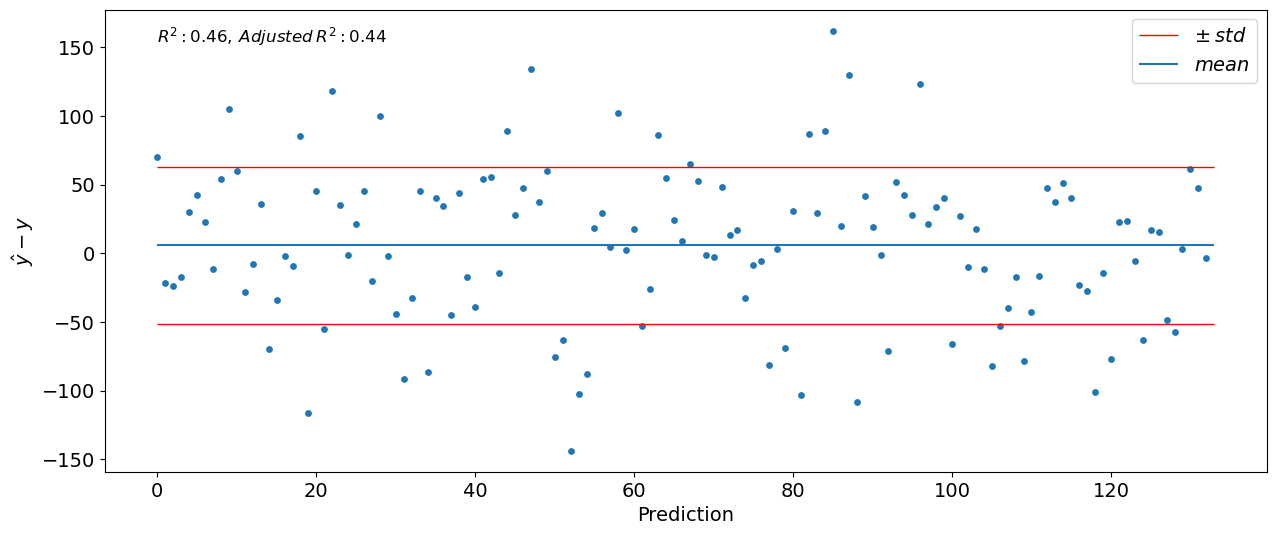

In [90]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



